In [ ]:
COPY THE DREADDS DATASET ONTO THE NEW HARD DRIVE 
AND ALSO THE MLATI DATASET
AND ANYTHING ELSE FROM FORMATTED DATA
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#Guide for Processing Sessions with Dreadds2 Class
#Imports & Setup
from myphdlib.interface.nope import NOPESession
from myphdlib.pipeline.prediction import predictSaccadeDirection
from myphdlib.pipeline.prediction import predictSaccadeEpochs
import matplotlib.pylab as plt
import os
import re
import numpy as np
#from felsen_analysis.toolkit.opto import removeArtifacts
import felsen_analysis.toolkit.opto as op

In [4]:
#Extract Labjack Event, Ephys & Timestamping Info
#THIS IS WITHOUT ANYTHING RELATED TO SACCADES
#first need to format session properly
sessionsToProcess = ['/media/jbhunt/EPHYS-01-BACKUP/opto/2025-09-22/ChR2GAD2',
             '/media/jbhunt/EPHYS-01-BACKUP/opto/2025-09-23/ChR2GAD2',
                '/media/jbhunt/EPHYS-01-BACKUP/opto/2025-09-25/ChR2GAD2',
            '/media/jbhunt/EPHYS-01-BACKUP/opto/2025-09-26/ChR2GAD2',
            '/media/jbhunt/EPHYS-01-BACKUP/opto/2025-09-27/ChR2GAD2',
            '/media/jbhunt/EPHYS-01-BACKUP/opto/2025-09-29/ChR2GAD2'
]
session = NOPESession('/media/jbhunt/EPHYS-01-BACKUP/opto/2025-09-30/ChR2GAD2')
#for sess in sessionsToProcess:
#session = NOPESession(sess)
session._createLabjackDataMatrix()
session._extractLabjackTimespace()
session._extractBarcodeSignals()
session._decodeBarcodeSignals()
session._estimateTimestampingFunction()

INFO: (chr2gad2, 2025-09-30) Creating labjack data matrix
INFO: (chr2gad2, 2025-09-30) Extracting labjack timespace
INFO: (chr2gad2, 2025-09-30) Extracting barcode signals
INFO: (chr2gad2, 2025-09-30) Decoding barcode signals
INFO: (chr2gad2, 2025-09-30) Estimating timestamping function


In [10]:
#this preps data for artifact removal, change all path names 
h5file = '/media/jbhunt/EPHYS-01-BACKUP/opto/2025-09-30/ChR2GAD2/output.hdf'
basePath = '/media/jbhunt/EPHYS-01-BACKUP/opto/Open Ephys/2025-09-30_12-49-33'
#clusterFile = '/media/jbhunt/One Touch/Open Ephys/2025-09-10_09-29-10/Record Node 101/experiment1/recording1/continuous/Neuropix-PXI-100.ProbeA-AP/kilosort4/spike_clusters.npy'
session2 = NOPESession('/media/jbhunt/EPHYS-01-BACKUP/opto/2025-09-30/ChR2GAD2')
matrix = session2.load('labjack/matrix')
opto = matrix[:, 14]
optoIndices = np.where(np.diff(opto) == 1)[0]
optoTimes = session2.computeTimestamps(optoIndices)

In [11]:
#this actually removes artifacts
op.removeArtifacts(basePath, 'chr2gad2', 'linear', optoTimes, ms_before=0.5, ms_after=3, offsets=True)

7147.1968


write_binary_recording:   0%|          | 0/7148 [00:00<?, ?it/s]

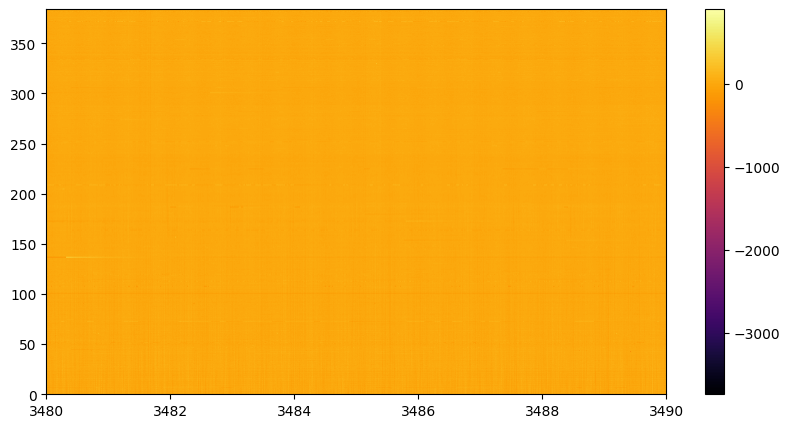

In [47]:
#this allows us to verify that artifact removal happened successfully with a plot
#after this, we want to kilosort our new .dat file and phy it
t2plot = [3480, 3490]
folderPath = '/media/jbhunt/EPHYS-01-BACKUP/opto/Open Ephys/2025-09-30_12-49-33/Record Node 101'
datPath = '/media/jbhunt/EPHYS-01-2/opto/Open Ephys/2025-09-30_12-49-33/Record Node 101/experiment1/recording1/continuous/Neuropix-PXI-100.ProbeA-AP/continuous.dat'
fig, ax = op.plotRawNeuropixelsData(t2plot, folderPath, datPath, vmin=None, vmax=None)

In [5]:
#after phying, we run these to process our ephys data
#now were ready to analyze!
sessionList = [
              #'/media/jbhunt/EPHYS-01-BACKUP/opto/2025-09-22/ChR2GAD2',
             #'/media/jbhunt/EPHYS-01-BACKUP/opto/2025-09-23/ChR2GAD2',
               # '/media/jbhunt/EPHYS-01-BACKUP/opto/2025-09-25/ChR2GAD2',
            '/media/jbhunt/EPHYS-01-BACKUP/opto/2025-09-26/ChR2GAD2',
            '/media/jbhunt/EPHYS-01-BACKUP/opto/2025-09-27/ChR2GAD2',
            '/media/jbhunt/EPHYS-01-BACKUP/opto/2025-09-29/ChR2GAD2']
#for path in sessionList:
path = '/media/jbhunt/EPHYS-01-BACKUP/opto/2025-09-30/ChR2GAD2'
session = NOPESession(path)
session._findDroppedFrames()
session._timestampCameraTrigger()
session._timestampVideoFrames()
session._timestampSaccades()
session._runStimuliModule()
session._computeRelativeEventTiming() #THIS NEEDS TO GET RUN AGAIN AFTER SACCADES & PROBES ARE EXTRACTED
session._runSpikesModule(sorting='manual')
session._extractSpikeDatasets(sorting='manual') #this flag will depend on which folder kilosort4 output is in


INFO: (chr2gad2, 2025-09-30) Finding dropped frames
INFO: (chr2gad2, 2025-09-30) Timestamping camera trigger signal
INFO: (chr2gad2, 2025-09-30) Timestamping video frames
INFO: (chr2gad2, 2025-09-30) Timestamping saccades
3
3
grayscreen
drifting
grayscreen
INFO: (chr2gad2, 2025-09-30) Computing relative event timing
INFO: (chr2gad2, 2025-09-30) Measuring spike-sorting quality
ecephys spike sorting: quality metrics module
Loading metric_data...
Unpacking and starting calculations..
Calculating isi violations
 ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Calculating presence ratio
 ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Calculating firing rate
 ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Calculating amplitude cutoff
 ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
total time: 20.09 seconds
Saving metrics to file '/media/jbhunt/EPHYS-01-BACKUP/opto/2025-09-30/ChR2GAD2/ephys/sorting/manual/quality_metrics.json'


In [21]:
#9/23 - missed a lot
#9/25 - fucked up stuff in last laser block

#sessionList = #'/media/jbhunt/EPHYS-01-BACKUP/opto/9-10-25/ChR2GAD3',
              #'/media/jbhunt/EPHYS-01-BACKUP/opto/9-11-25/ChR2GAD3',
              #'/media/jbhunt/EPHYS-01-BACKUP/opto/9-12-25/ChR2GAD3',
              #'/media/jbhunt/EPHYS-01-BACKUP/opto/9-15-25/ChR2GAD3',
              #'/media/jbhunt/EPHYS-01-BACKUP/opto/9-16-25/ChR2GAD3',
sessionList = ['/media/jbhunt/EPHYS-01-BACKUP/opto/9-17-25/ChR2GAD3',
              '/media/jbhunt/EPHYS-01-BACKUP/opto/9-18-25/ChR2GAD3']
              #'/media/jbhunt/EPHYS-01-BACKUP/opto/9-19-25/ChR2GAD3']


In [22]:
for path in sessionList:
    session = NOPESession(path)
    print(path)
    metadataHolder = session._runStimuliModule()

/media/jbhunt/EPHYS-01-BACKUP/opto/9-17-25/ChR2GAD3
3
3
grayscreen
pulse count mismatch
6980
6979
grayscreen
/media/jbhunt/EPHYS-01-BACKUP/opto/9-18-25/ChR2GAD3
3
3
grayscreen
drifting
grayscreen


In [46]:
session = NOPESession('/media/jbhunt/EPHYS-01-BACKUP/opto/2025-09-29/ChR2GAD2')
session.listAllDatasets()

barcodes/labjack/indices
barcodes/labjack/trains
barcodes/labjack/values
barcodes/neuropixels/indices
barcodes/neuropixels/trains
barcodes/neuropixels/values
labjack/matrix
labjack/timespace
pose/corrected
pose/decomposed
pose/filtered
pose/interpolated
pose/missing/left
pose/missing/right
pose/reoriented
pose/uncorrected
saccades/predicted/left/epochs
saccades/predicted/left/indices
saccades/predicted/left/labels
saccades/predicted/left/waveforms
saccades/putative/left/indices
saccades/putative/left/waveforms
tfp/b
tfp/fp
tfp/m
tfp/xp


In [9]:
6979 - 6799

180

In [10]:
print(len(session.load('stimuli/dg/motion/timestamps')))
print(len(session.load('stimuli/dg/iti/timestamps')))
print(len(session.load('stimuli/dg/grating/timestamps')))

60
60
60
